##Gradient Descent Task

In [1]:
import numpy as np
import matplotlib.pyplot as plt


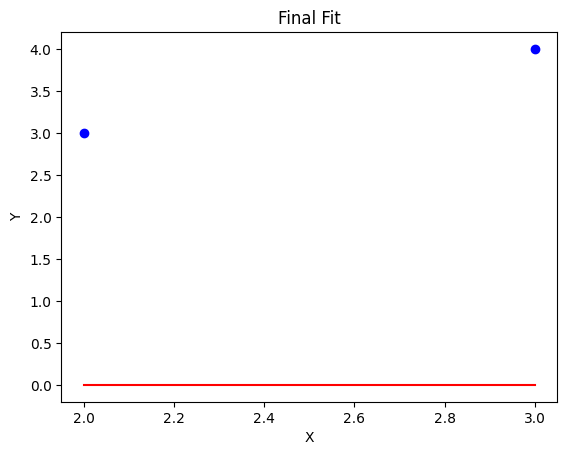

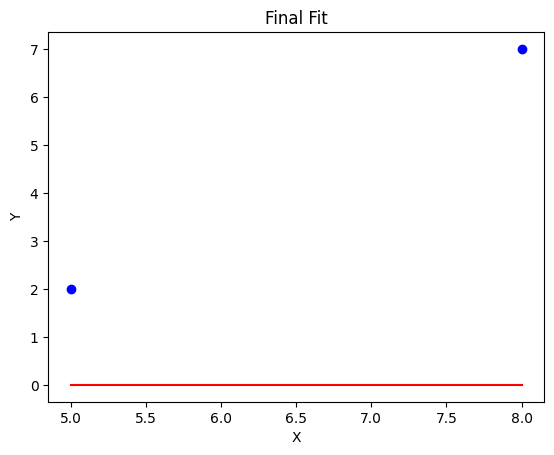

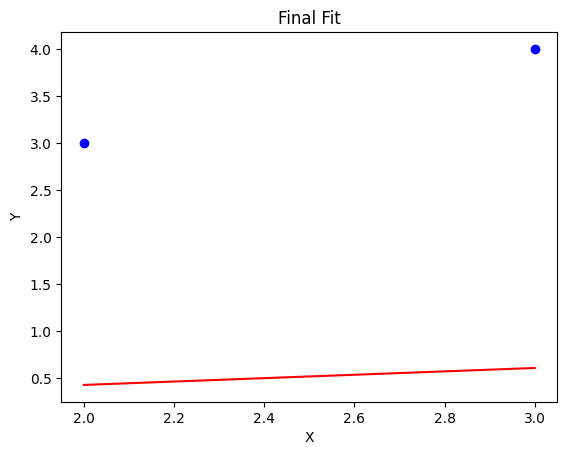

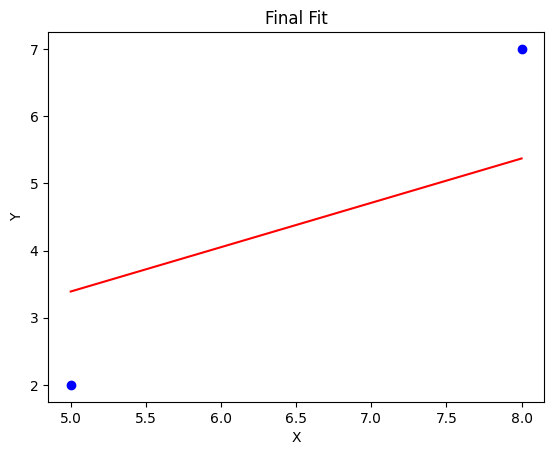

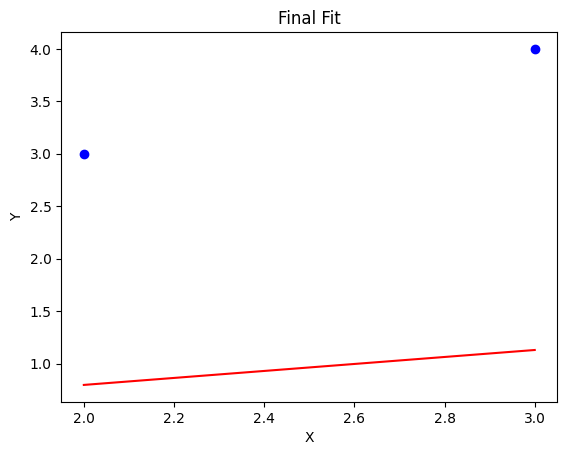

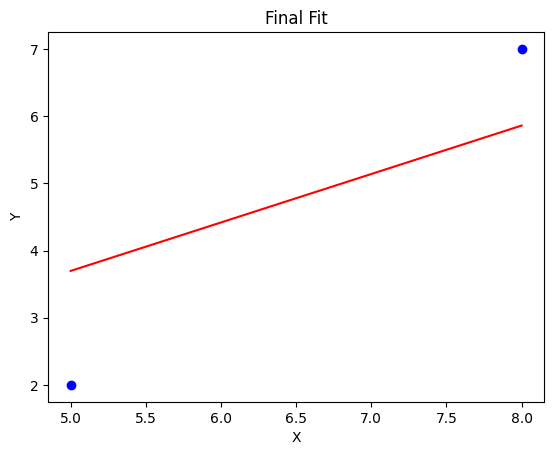

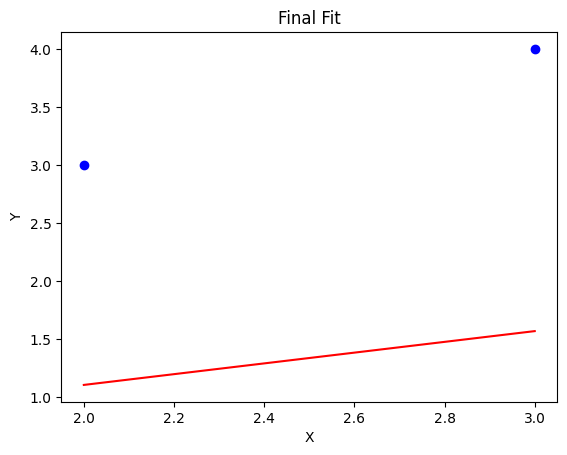

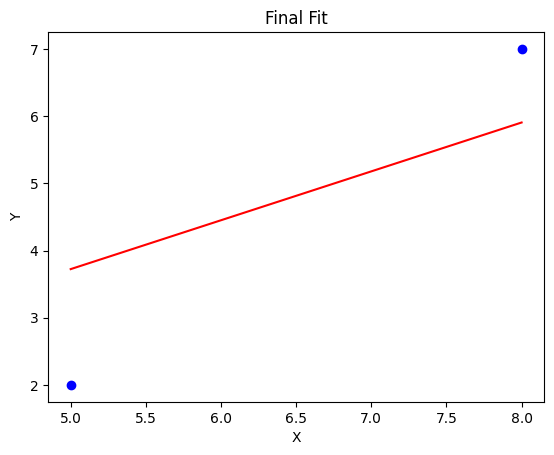

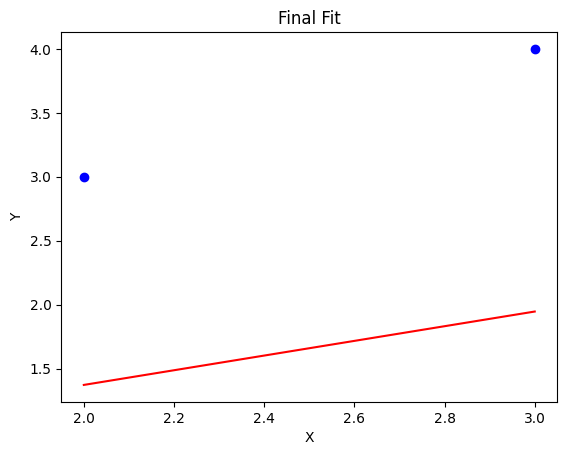

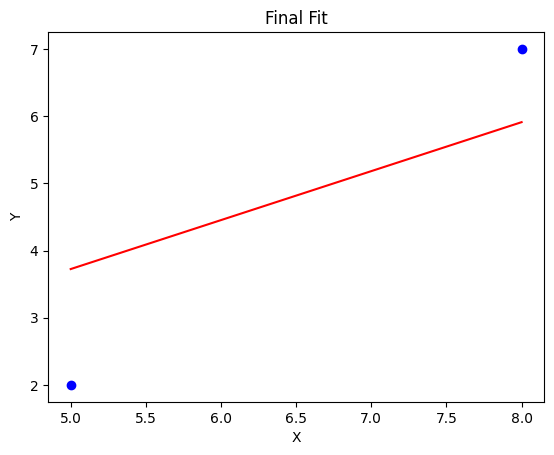

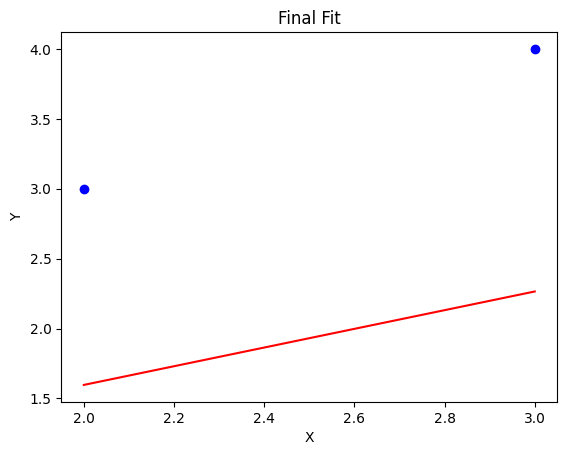

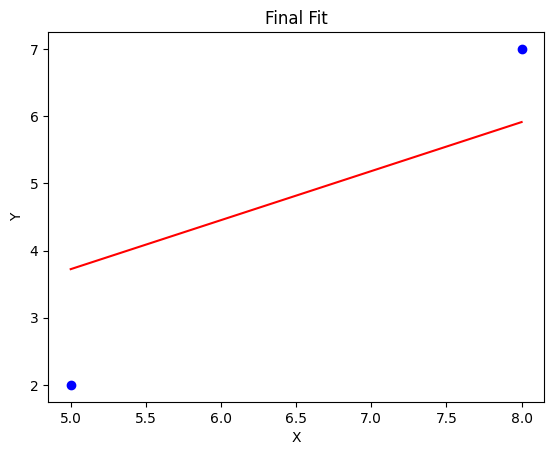

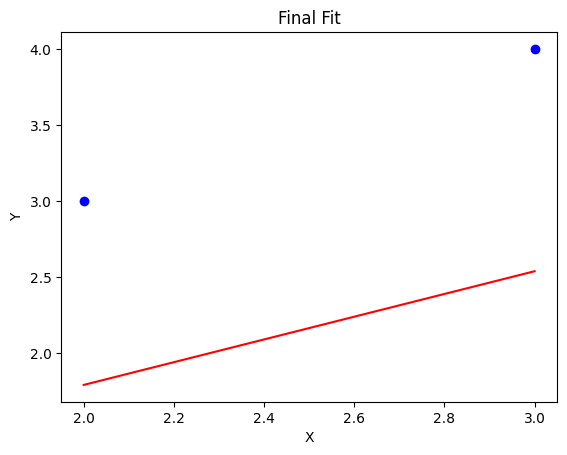

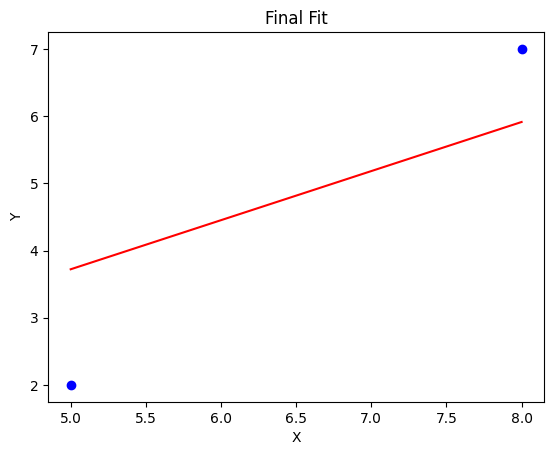

In [2]:


# Example 1 Data
X1 = np.array([2,3])
Y1 = np.array([3,4])

#Example 2 Data

X2 = np.array([5,8])
Y2 = np.array([2,7])

# Initialize parameters
m1 = 0
b1 = 0

m2 = 0
b2 = 0

# Learning rate
alpha = 0.01

# Number of iterations
iterations = 7

# Number of data points
n = len(X1)

# For storing values for visualization
m_values1 = []
b_values1 = []
loss_values1 = []

m_values2 = []
b_values2 = []
loss_values2 = []


# Gradient Descent Loop
for _ in range(iterations):

    #Example 1
    # Compute the Loss
    Y_pred1 = m1 * X1 + b1
    loss1 = (1/n) * sum((Y1 - Y_pred1)**2)

    # Compute the Gradients
    dm1 = -(2/n) * sum(X1 * (Y1 - Y_pred1))
    db1 = -(2/n) * sum(Y1 - Y_pred1)

    # Update Parameters
    m1 = m1 - alpha * dm1
    b1 = b1 - alpha * db1

    # Store values
    m_values1.append(m1)
    b_values1.append(b1)
    loss_values1.append(loss1)

    # Visualization
    plt.scatter(X1, Y1, color='blue')
    plt.plot(X1, Y_pred1, color='red')
    plt.title('Final Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    #Example 2
    # Compute the Loss
    Y_pred2 = m2 * X2 + b2
    loss2 = (1/n) * sum((Y2 - Y_pred2)**2)

    # Compute the Gradients
    dm2 = -(2/n) * sum(X2 * (Y2 - Y_pred2))
    db2 = -(2/n) * sum(Y2 - Y_pred2)

    # Update Parameters
    m2 = m2 - alpha * dm2
    b2 = b2 - alpha * db2

    # Store values
    m_values2.append(m2)
    b_values2.append(b2)
    loss_values2.append(loss2)

    # Visualization of the results
    plt.scatter(X2, Y2, color='blue')
    plt.plot(X2, Y_pred2, color='red')
    plt.title('Final Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


In [3]:
# Final values for m, b, and loss
print(m1, b1, loss1, m2, b2, loss2)

0.8164893845706199 0.31852997703723 1.8042026985942579 0.73154574606558 0.06152615234252997 2.0718344050425235


##Attention Mechanism Exercise

In [4]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import numpy as np


In [5]:
#Creating two examples of sentences with homonym (book)
sentence1 = 'He had to book a flight to New York'
sentence2 = 'She wanted to read a book before going to bed'


In [9]:
# Encode text

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

s1 = tokenizer(sentence1, return_tensors="pt")
s2 = tokenizer(sentence2, return_tensors="pt")


# Get model output
with torch.no_grad():
    outputs1 = model(**s1)
    outputs2 = model(**s2)
# Get attentions
attentions1 = outputs1.attentions
attentions2 = outputs2.attentions

attention1 = attentions1[0][0, 0, :, :].detach().numpy()
attention2 = attentions2[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens1 = tokenizer.tokenize(tokenizer.decode(s1['input_ids'][0]))
tokens2 = tokenizer.tokenize(tokenizer.decode(s2['input_ids'][0]))

<ipython-input-10-7c1450a2f189>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([''] + tokens1, rotation=90)
<ipython-input-10-7c1450a2f189>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([''] + tokens1)
<ipython-input-10-7c1450a2f189>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([''] + tokens2, rotation=90)
<ipython-input-10-7c1450a2f189>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([''] + tokens2)


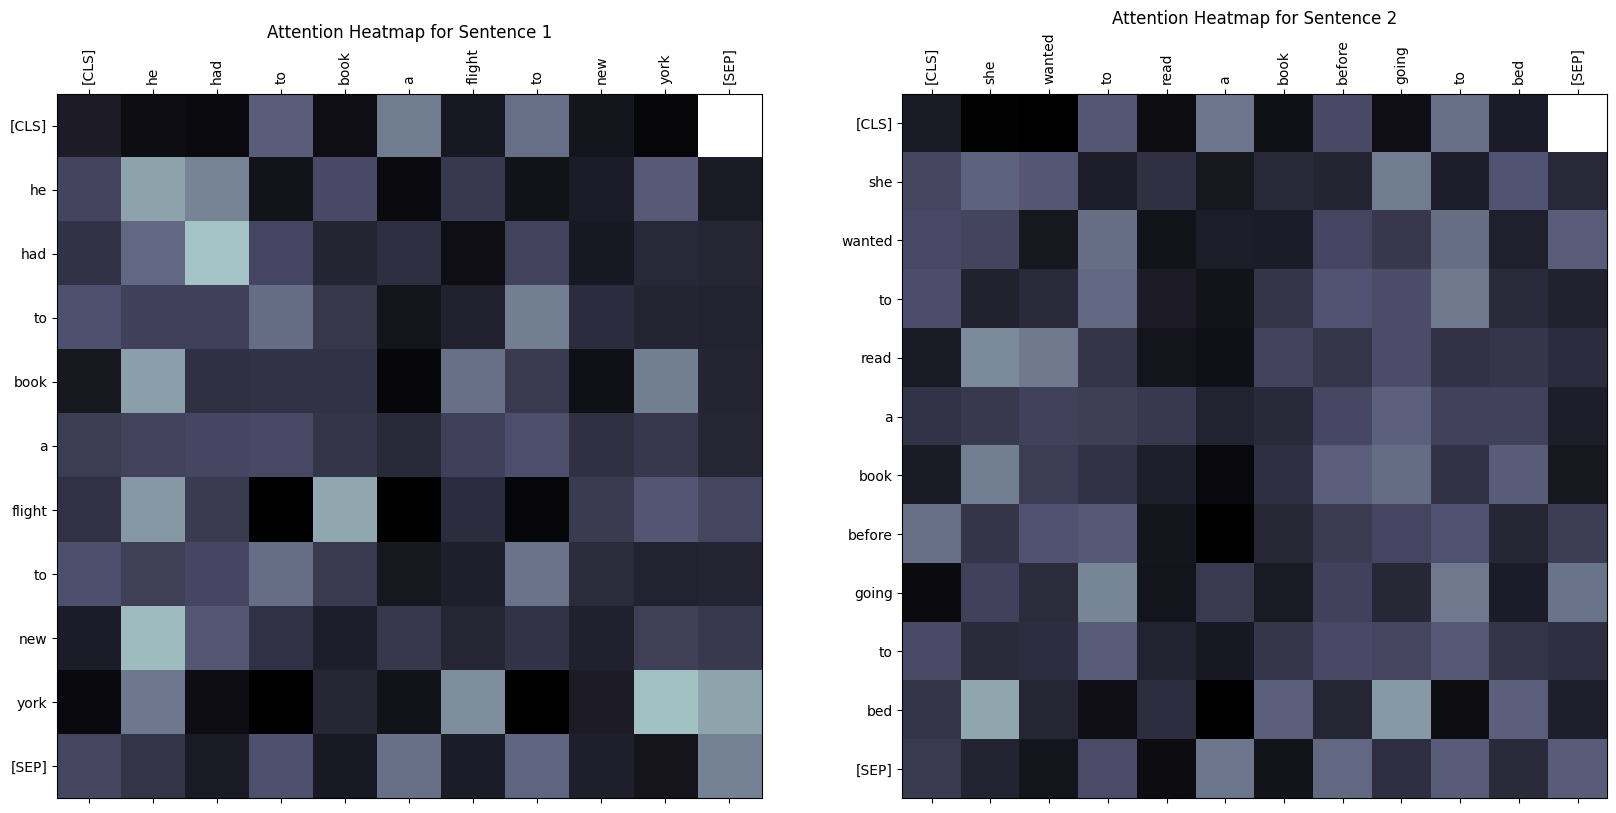

In [10]:
#def plot_attention_heatmaps(attention1, attention2, tokens1, tokens2):
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].matshow(attention1, cmap='bone')
axs[1].matshow(attention2, cmap='bone')

    # Set up axes for the first heatmap
axs[0].set_xticklabels([''] + tokens1, rotation=90)
axs[0].set_yticklabels([''] + tokens1)
axs[0].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].set_title("Attention Heatmap for Sentence 1")

    # Set up axes for the second heatmap
axs[1].set_xticklabels([''] + tokens2, rotation=90)
axs[1].set_yticklabels([''] + tokens2)
axs[1].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[1].set_title("Attention Heatmap for Sentence 2")
plt.show()

# Assuming tokens1 and tokens2 are tokenized versions of sentence 1 and 2
# Assuming attention1 and attention2 are attention scores for sentence 1 and 2

#plot_attention_heatmaps(attention1, attention2, tokens1, tokens2)